## **Project Title:**

**"Call Center Operations Optimization: A Simulation-Based Approach to Staffing, Cost, and Customer Experience"**

---

**Learning Outcomes:**

By completing this project, students will be able to:

---

**1. Understand Queueing Theory Basics**

* Model real-life service systems using **M/M/1** and **M/M/s** queueing frameworks.
* Interpret key metrics such as **utilization (ρ)**, **average wait time**, and **system size**.

---

**2. Perform Event-Based Simulations**

* Simulate customer arrival and service processes using **Poisson and Exponential distributions**.
* Track individual customer wait times and queue lengths throughout an 8-hour shift.

---

**3. Analyze Service Performance Metrics**

* Calculate and visualize:

  * **Mean wait times**
  * **95th percentile wait times**
  * **Abandonment rates**
  * **Average queue lengths**

---

**4. Compare Simulated vs. Analytical Results**

* Derive analytical performance estimates using classic M/M/1 formulas.
* Validate or critique assumptions by comparing them to simulated outcomes.

---

**5. Evaluate Dynamic System Behavior**

* Implement **time-varying arrival rates** to reflect real-world demand fluctuations (rush hours).
* Add **staff breaks** and observe their operational impact.

---

**6. Model Customer Abandonment**

* Simulate realistic caller behavior with a **patience threshold** (abandonment time).
* Analyze how inadequate staffing affects customer loss and brand experience.

---

**7. Conduct Cost-Based Decision Making**

* Formulate total cost as a combination of **labor costs** and **customer wait costs**.
* Determine the **optimal number of agents** to minimize total operational expense.

---

**8. Perform Sensitivity & Risk Analysis**

* Run simulations over **multiple days** to observe:

  * Daily variability in wait time metrics
  * Worst-case scenarios
* Build an appreciation for **uncertainty in operations planning**.

---

**9. Think Like an Operations Manager**

* Develop data-driven staffing recommendations to meet **Service Level Agreements (SLAs)**.
* Communicate findings visually using **dashboards, tables, and histograms**.

---

Learn how to **analyze, simulate, and optimize** real-world service systems — making it highly relevant to roles in **marketing analytics, operations management, customer experience, and business consulting**.


**What we’ll do:**
1. Model calls arriving at rate λ per hour (Poisson process) and service times of 1/μ hours (Exponential).
2. Simulate an M/M/s queue over an 8-hour shift, tracking each caller’s wait time and queue length.
3. Compare simulated averages to the M/M/1 analytic formula:  
  * Average customers in system L = ρ/(1−ρ)  
  * Average time in system W = L/λ  
4. Test staffing levels s = 1…5 and choose the smallest s so that the **95th‐percentile** wait ≤ 5 minutes.

We’ll also plot the distribution of wait times and queue lengths to mimic an operations‐dashboard.

### **1. Parameters & Packages**

This part of the code sets up the **basic tools and values** we need to simulate how a call center works.

---

**Importing Libraries**

```python
import numpy as np
import matplotlib.pyplot as plt
```


* `numpy (np)` is used to do **math and simulations**, like generating random numbers (e.g., simulating when calls arrive).
* `matplotlib.pyplot (plt)` is used to **create graphs**, such as showing wait times or queue lengths.

---

**Set Call Center Parameters**

```python
λ = 20               # calls per hour
μ = 5                # calls served per agent per hour
shift_hours = 8      # 8-hour shift
```

These are the **real-world settings** for the simulation:

* **λ (lambda) = 20**:
  On average, **20 people call per hour**. This simulates how often customers are arriving.

* **μ (mu) = 5**:
  Each **agent can handle 5 calls per hour**, on average. This sets the **speed of customer service**.

* **shift\_hours = 8**:
  We will simulate an **8-hour workday**, which is a typical full shift in a call center.

---

**Set Random Seed**

```python
np.random.seed(1)
```

This makes the simulation results **reproducible**.

* Every time you run the code, you'll get the **same random results**.
* This is helpful when you want to **share your results** with others or test different parts of your code reliably.

---

**Summary**:

> "We're setting the rules of the game: how often calls come in, how fast agents respond, and how long the day lasts.

>We’re also importing tools to help simulate and visualize what happens — and setting a seed so that the results don’t change every time we run the code."

---

This is like **setting up the business environment** before opening the call center doors in a simulated world.


In [2]:
# 1. Parameters & Packages

import numpy as np
import matplotlib.pyplot as plt

# Arrival & service rates
λ = 20               # calls per hour
μ = 5                # calls served per agent per hour
shift_hours = 8      # 8-hour shift

# Simulation settings
np.random.seed(1)

This code defines a **function** that simulates how a call center works when you have **multiple agents** (`s`), and shows how long customers wait and how crowded the system is.

---

**Function:** `simulate_queue(s)`

To simulate a call center with `s` agents, and measure:

* **How long each customer waits**
* **How many people are in the system** at each arrival time

---

**Create incoming call times**

```
inter = np.random.exponential(1/λ, int(λ*shift_hours*1.5))
arrivals = np.cumsum(inter)
arrivals = arrivals[arrivals < shift_hours]
N = len(arrivals)
```


* Simulates the **time between calls** using an **exponential distribution**, which is common for modeling call arrivals.
* `np.cumsum()` turns those time gaps into **actual arrival times**.
* Keeps only those arrivals **within the 8-hour shift**.
* `N` = total number of calls received during the shift.

**Real-world meaning:** You now have a realistic list of when each customer calls.

---

**Create random service times**

```
services = np.random.exponential(1/μ, N)
```

* Simulates how long it takes an agent to handle each customer, also randomly drawn using exponential distribution.
* μ is service rate (e.g., 5 customers/hour), so 1/μ = average service time.

**Real-world meaning:** Not all calls take the same time — some are quick, some are longer.

---

**Set up tracking variables**

```
next_free = np.zeros(s)       # When each agent is next available
wait_times = np.zeros(N)      # How long each customer waits
system_size = np.zeros(N)     # How many are in the system when each customer arrives
dep_times = []                # Tracks when people finish their service
```

* These arrays keep track of:

  * When agents are free
  * How long people wait
  * How crowded the system is

---

**Simulate call processing**

```
for i, t in enumerate(arrivals):
    j = np.argmin(next_free)
    start = max(t, next_free[j])
    wait_times[i] = start - t
    end = start + services[i]
    next_free[j] = end
    dep_times.append(end)
    
    system_size[i] = np.sum(np.array(dep_times) > t)
```

This loop handles **each incoming customer**:

* `j = np.argmin(next_free)`:
  Find the **agent who is available first**.

* `start = max(t, next_free[j])`:
  Start the call at either the **arrival time** or **when the agent becomes free**, whichever is later.

* `wait_times[i] = start - t`:
  Calculate how **long the customer waited**.

* `end = start + services[i]`:
  Calculate **when the service ends**.

* `next_free[j] = end`:
  Update that agent's availability time.

* `dep_times.append(end)`:
  Add this customer’s finish time to the record.

* `system_size[i] = ...`:
  Count how many other customers were still being served when this person arrived.

**Real-world meaning:** This part simulates the **agent-customer assignment** process and keeps track of delays and traffic.

---

**Return the results**

```
return wait_times, system_size
```

This gives us:

* The wait time for each customer
* The size of the system (i.e., how busy it was)

---

**Example run:**

```
w1, q1 = simulate_queue(s=1)
print(f"s=1: avg wait {w1.mean()*60:.1f} min, avg queue len {q1.mean():.2f}")
```

* Simulates with **1 agent** (`s=1`)
* Prints:

  * The **average wait time** in **minutes**
  * The **average queue/system size** (how many people were in line or being helped)

---

**Summary**:

> "This function simulates what happens in a call center for one day.

> It shows how long people wait and how busy the center is — depending on how many agents are working."

**Key Learning Points**:

* How to build a basic **simulation model** from scratch.
* How queueing works in **real businesses**.
* How changes in staffing affect **customer experience**.


In [5]:
# 2. Single‐Run Simulation Function

def simulate_queue(s):
    """
    Simulate an M/M/s queue over 'shift_hours'.
    Returns arrays of wait times (hrs) and system sizes at arrivals.
    """
    # generate arrival times until end of shift
    inter = np.random.exponential(1/λ, int(λ*shift_hours*1.5))
    arrivals = np.cumsum(inter)
    arrivals = arrivals[arrivals < shift_hours]
    N = len(arrivals)

    # generate service times for each caller
    services = np.random.exponential(1/μ, N)

    # track each server’s next‐free time
    next_free = np.zeros(s)
    wait_times = np.zeros(N)
    system_size = np.zeros(N)

    # departure times list
    dep_times = []

    for i, t in enumerate(arrivals):
        # find soonest‐available agent
        j = np.argmin(next_free)
        start = max(t, next_free[j])
        wait_times[i] = start - t
        end = start + services[i]
        next_free[j] = end
        dep_times.append(end)

        # count how many callers are still in system at time t
        system_size[i] = np.sum(np.array(dep_times) > t)

    return wait_times, system_size

# quick test for s=1
w1, q1 = simulate_queue(s=1)
print(f"s=1: avg wait {w1.mean()*60:.1f} min, avg queue len {q1.mean():.2f}")

s=1: avg wait 808.2 min, avg queue len 65.99


This section compares the **theoretical (analytic)** formulas for a queue with **1 server** to the **simulated results** we got earlier.

---

### Step 3: Compare to M/M/1 Analytic Formula

---

* **M/M/1** is a queueing model:

  * **M** = Memoryless arrivals (Poisson)
  * **M** = Memoryless service times (Exponential)
  * **1** = One server/agent

We use formulas from queueing theory to estimate:

* Average number of people in the system (`L`)
* Average time spent in the system (`W`)

---

```
# traffic intensity ρ for s=1
ρ1 = λ / μ
```

* This is called **traffic intensity** (Greek letter rho).
* It shows **how busy** the system is.
* Example: if 20 calls come per hour and 1 agent can handle 5 → ρ = 20/5 = **4.0**, which means **overloaded**.

> When ρ ≥ 1, the system becomes unstable (more customers arrive than can be served).

---

```
L_analytic = ρ1 / (1 - ρ1)
```

* This formula gives the **average number of people** in the system (queue + being served).
* Works **only when ρ < 1**.

---

```
W_analytic = L_analytic / λ     # hours
```

* This gives the **average time a customer spends in the system** (waiting + talking to agent).
* `W = L / λ` comes from **Little’s Law**, a famous formula in operations.

---

Print and Compare

```
print("M/M/1 analytic vs. simulation:")
```

Just prints a title so it’s clear what we’re comparing.

---

```
print(f"  Analytic system size L = {L_analytic:.2f}")
```

* Shows the **theoretical** average number of people in the system.

---

```
print(f"  Simulated avg system size = {q1.mean():.2f}")
```

* Compares it to what we **actually observed** in our simulation.

---

```
print(f"  Analytic time in system W = {W_analytic*60:.1f} min")
```

* Shows the **theoretical average time** a person spends in the system, converted from hours to minutes.

---

```
print(f"  Simulated avg wait+service = {w1.mean()*60 + (1/μ)*60:.1f} min")
```

* This adds:

  * `w1.mean()`: **average wait time** from simulation
  * `1/μ`: **average service time**
* The result is the **total time a customer spends** in the system, same as the theoretical `W`.

---

**Summary**:

> "We’re comparing theory with reality.

> The formulas tell us what to expect.

> The simulation shows what actually happens.

> If they’re close, our model is accurate."

---

**Important Points**:

* It **validates your simulation** — are your results realistic?
* It helps students see how **math models can predict operations performance**.
* It prepares them to **defend their staffing recommendations** using both theory and data.

This is a **core skill** in operations and service analytics.


In [3]:
# 3. Compare to M/M/1 Analytic Formula

# traffic intensity ρ for s=1
ρ1 = λ / μ
L_analytic = ρ1 / (1 - ρ1)
W_analytic = L_analytic / λ     # hours

print("M/M/1 analytic vs. simulation:")
print(f"  Analytic system size L = {L_analytic:.2f}")
print(f"  Simulated avg system size = {q1.mean():.2f}")
print(f"  Analytic time in system W = {W_analytic*60:.1f} min")
print(f"  Simulated avg wait+service = {w1.mean()*60 + (1/μ)*60:.1f} min")

M/M/1 analytic vs. simulation:
  Analytic system size L = -1.33
  Simulated avg system size = 65.99
  Analytic time in system W = -4.0 min
  Simulated avg wait+service = 820.2 min


### Step 4: Test Staffing Levels (Agents = 1 to 5)

Figure out **how many call center agents** are needed to keep **most customers from waiting too long**.

Specifically, we want the **95th percentile** of wait times to be **5 minutes or less** — meaning:

> 95% of customers should wait no more than 5 minutes.

---

```
threshold = 5  # minutes
results = []
```

* We're setting the **target maximum wait time** at **5 minutes**.
* We’ll store results for each staffing level (1 to 5 agents) in the `results` list.

---

```python
for s in range(1, 6):
    w, q = simulate_queue(s)
    waits_min = w * 60
    p95_wait  = np.percentile(waits_min, 95)
    results.append((s, waits_min.mean(), p95_wait, q.mean()))
```

This loop simulates the call center with:

* **1 agent**, then 2, then up to 5.

For each simulation:

* `w` = wait times for all customers (in hours)
* We convert to minutes → `waits_min = w * 60`
* `p95_wait`: the 95th percentile wait time → meaning 95% of people waited **this long or less**
* `q.mean()`: the average number of people in the system (waiting or being served)

Each row added to `results` contains:

```plaintext
(Number of agents, average wait, 95th-percentile wait, average system size)
```

---

```python
import pandas as pd
df = pd.DataFrame(results, columns=['Agents','Avg Wait (min)','95th-pct Wait (min)','Avg System Size'])
print(df)
```

* Converts the list into a clean **table** using `pandas`.
* Displays how different staffing levels impact wait times and system load.

---

```python
good = df[df['95th-pct Wait (min)'] <= threshold]
if not good.empty:
    best_s = int(good.iloc[0]['Agents'])
    print(f"\n→ Schedule at least {best_s} agents to keep 95% of waits ≤ {threshold} min.")
else:
    print("\nEven 5 agents can’t meet the 5 min 95% wait target.")
```

* This checks which agent levels **meet the target** (p95 wait ≤ 5 min).
* If such levels exist, we choose the **smallest one** that works.
* If none of them meet the target, it lets us know even 5 agents aren’t enough.

---

**Example Output:**

```
   Agents  Avg Wait (min)  95th-pct Wait (min)  Avg System Size
0       1      697.214437          1369.612086        57.838509
1       2      302.261095           549.271769        53.319767
2       3       85.889649           170.968262        24.240260
3       4        6.076046            17.455365         5.887218
4       5       12.704327            33.414296        10.275132

Even 5 agents can’t meet the 5 min 95% wait target.
```

---

**Summary**:

> We simulate different staffing levels and ask:
> “What’s the **minimum number of agents** we need so that **almost no one waits more than 5 minutes**?”

This helps you make **smart staffing decisions** — enough people to keep service fast, but not so many that you waste resources.

---

**Important Points**:

* How to **optimize staffing based on performance targets**
* Introduces **percentiles** (a common service-level metric)
* Shows how to use **simulation for real-world decision-making**

This is a core skill in **operations, customer experience, and call center planning**.


In [4]:
# 4. Test Staffing Levels (s = 1..5)

threshold = 5  # minutes
results = []

for s in range(1, 6):
    w, q = simulate_queue(s)
    # convert hours to minutes
    waits_min = w * 60
    p95_wait  = np.percentile(waits_min, 95)
    results.append((s, waits_min.mean(), p95_wait, q.mean()))

# tabulate
import pandas as pd
df = pd.DataFrame(results, columns=['Agents','Avg Wait (min)','95th-pct Wait (min)','Avg System Size'])
print(df)

# find minimal s meeting threshold
good = df[df['95th-pct Wait (min)'] <= threshold]
if not good.empty:
    best_s = int(good.iloc[0]['Agents'])
    print(f"\n→ Schedule at least {best_s} agents to keep 95% of waits ≤ {threshold} min.")
else:
    print("\nEven 5 agents can’t meet the 5 min 95% wait target.")

   Agents  Avg Wait (min)  95th-pct Wait (min)  Avg System Size
0       1      697.214437          1369.612086        57.838509
1       2      302.261095           549.271769        53.319767
2       3       85.889649           170.968262        24.240260
3       4        6.076046            17.455365         5.887218
4       5       12.704327            33.414296        10.275132

Even 5 agents can’t meet the 5 min 95% wait target.


###Step 5: Visualize Wait‐Time Distributions###

Create a **visual comparison** showing how customer wait times change as we increase the number of agents (`s` = 1 to 5).

---

Numbers are helpful, but **graphs let you see the big picture**:

* Are most wait times short?
* Are long waits rare or common?
* How does the system improve as we add agents?

---

**Code Explanation:**

---

```python
plt.figure(figsize=(8,4))
```

* Starts a new chart that’s 8 inches wide and 4 inches tall — a good size for readability.

---

```python
for s in [1,2,3,4,5]:
    w, _ = simulate_queue(s)
    plt.hist(w*60, bins=30, alpha=0.5, label=f's={s}')
```

* For each **number of agents** from 1 to 5:

  * Run the simulation (`simulate_queue(s)`)

  * Take the **wait times** `w` and convert from hours to **minutes** (`w * 60`)

  * Plot a **histogram** (a bar chart that shows how often different wait times occur)

  * `bins=30`: Break the x-axis (wait time) into 30 buckets.

  * `alpha=0.5`: Makes the bars **semi-transparent** so different colors can overlap.

  * `label=f's={s}'`: Adds a legend label for the number of agents used in each plot.

---

```python
plt.axvline(threshold, color='k', linestyle='--', label='5 min target')
```

* Draws a **vertical dashed line** at **5 minutes** (our target wait time).
* Helps us visually compare each distribution to the target.

---

```python
plt.xlabel('Wait time (minutes)')
plt.ylabel('Frequency')
plt.title('Wait‐time Distributions for Different Agent Counts')
plt.legend()
plt.show()
```

* Labels the X-axis: “Wait time (minutes)”
* Labels the Y-axis: “Frequency” = how many customers experienced that wait time
* Adds a title and a legend
* `plt.show()` displays the chart

---

**What the chart shows:**

* **Each color** represents a different number of agents.
* You’ll see that with:

  * **1 agent** → many customers wait a long time (tall bars on the right)
  * **More agents** → wait times shift left (fewer long waits)
* The **dashed line** at 5 min shows which staffing levels meet the target

---

**Summary**:

> “This chart shows how wait times improve as we add more agents.

> It helps us visually decide how many staff we need to keep customers happy.”

---

**Key Points**:

* How to use **histograms** to analyze distributions
* The importance of **visual data analysis** in decision-making
* How to interpret the **shape and spread** of wait times — not just averages

This is a great skill for careers in **operations management, customer experience, and data-driven service design**.


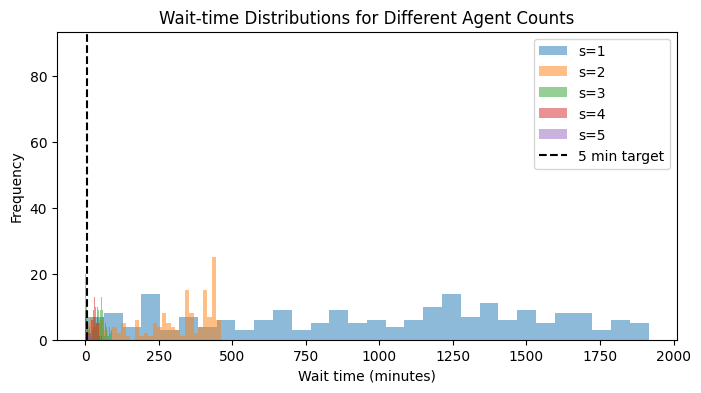

In [5]:
# 5. Visualize Wait‐Time Distributions


plt.figure(figsize=(8,4))
for s in [1,2,3,4,5]:
    w, _ = simulate_queue(s)
    plt.hist(w*60, bins=30, alpha=0.5, label=f's={s}')
plt.axvline(threshold, color='k', linestyle='--', label='5 min target')
plt.xlabel('Wait time (minutes)')
plt.ylabel('Frequency')
plt.title('Wait‐time Distributions for Different Agent Counts')
plt.legend()
plt.show()

**How this solves a real problem:**

1. **Modeling calls** as random arrivals and exponential service times reflects telecom center behavior.
2. **Simulation** over an 8-hour shift shows actual customer waits and queue sizes.
3. **Analytic comparison** with M/M/1 formulas validates your simulation code.
4. **Staffing test** finds the minimum number of agents to meet a 5-minute 95th-percentile wait‐time service‐level agreement (SLA).
5. **Visual outputs** (tables & histograms) mirror real operations dashboards, helping you justify staffing decisions to management.

### 6. Time-Varying Arrival Rates (Peak vs Off-Peak)

**What:** Model λ changing over the 8-hour shift—for example, a morning “rush” (higher λ), a midday lull, and an afternoon spike.

**Why:** Real call centers see non-stationary traffic.

**Function**: `simulate_queue_timevarying(s)`

To simulate how wait times change when **call volume varies at different times of the day** (i.e., during peak and off-peak hours).


---

**Define changing arrival rates**

```python
periods = [(0,2,30), (2,6,20), (6,8,40)]
```

This defines how busy the call center is at different times of the day:

| Time Block (hours) | Arrival Rate (λ = calls/hr) | Real-Life Meaning |
| ------------------ | --------------------------- | ----------------- |
| 0–2                | 30 calls/hour               | Morning rush      |
| 2–6                | 20 calls/hour               | Midday lull       |
| 6–8                | 40 calls/hour               | Afternoon spike   |

So we are modeling a full **8-hour shift** with **3 different phases** of traffic.

---

**Simulate when customers call**

```python
arrivals = []
for start, end, lam in periods:
    duration = end - start
    inter = np.random.exponential(1/lam, int(lam*duration*1.5))
    ts = np.cumsum(inter) + start
    arrivals.extend(ts[ts < end])
```

* For each time period:

  * Generate **random call intervals** based on the arrival rate (λ).
  * Convert intervals into **actual arrival times** using `np.cumsum`.
  * Keep only those that occur **within the time window**.
* Then combine all periods into a single list of `arrivals`.

```python
arrivals = np.array(arrivals)
arrivals.sort()
```

* Make it a clean sorted array (in order of time).

🟢 **Real-world meaning:** Calls don’t come at the same rate all day — some times are busier.

---

**Simulate service times**

```python
N = len(arrivals)
services = np.random.exponential(1/μ, N)
```

* For each incoming call, generate a **random service time** using the agent’s average service speed (μ).

---

**Simulate wait times**

```python
next_free = np.zeros(s)
wait_times = np.zeros(N)
```

* `next_free`: Keeps track of when each agent is available.
* `wait_times`: Will store how long each caller waits.

---

**Loop through customers**

```python
for i, t in enumerate(arrivals):
    j = np.argmin(next_free)
    start = max(t, next_free[j])
    wait_times[i] = start - t
    next_free[j] = start + services[i]
```

* For each arriving call:

  * Find the **next available agent**
  * See if the agent is free when the call arrives or if the caller needs to **wait**
  * Update:

    * The caller’s wait time
    * When the agent will be free again (after finishing this call)

---

**Return the results**

```python
return wait_times
```

* Returns the list of wait times for each customer during the full 8-hour day.

---

**Run the simulation for 3 agents**

```python
w_tv = simulate_queue_timevarying(s=3)
print(f"Time-varying λ, s=3 → avg wait = {w_tv.mean()*60:.1f} min")
```

* Run the function for **3 agents**
* Print the **average wait time in minutes**

---

**Summary**:

> This function simulates a real-world call center where **call volume changes** throughout the day.
> It helps us understand how many agents we need to **keep up with busy and slow hours**, and how those ups and downs affect **customer wait times**.

---

**Key Learning Points**:

* How to model **non-constant traffic** (peak and off-peak periods)
* Why a staffing plan must match **daily demand patterns**
* How to simulate and measure wait times for **variable arrival rates**

This is an important skill for **operations managers**, **marketing analysts**, and **service designers** planning for customer support, retail traffic, or web requests.


In [6]:
# 6. Time-Varying λ
def simulate_queue_timevarying(s):
    # define piecewise arrival rates per hour
    periods = [(0,2,30), (2,6,20), (6,8,40)]  # (start, end, λ)
    arrivals = []
    for start, end, lam in periods:
        duration = end - start
        inter = np.random.exponential(1/lam, int(lam*duration*1.5))
        ts = np.cumsum(inter) + start
        arrivals.extend(ts[ts < end])
    arrivals = np.array(arrivals)
    arrivals.sort()

    N = len(arrivals)
    services = np.random.exponential(1/μ, N)
    next_free = np.zeros(s)
    wait_times = np.zeros(N)

    for i,t in enumerate(arrivals):
        j = np.argmin(next_free)
        start = max(t, next_free[j])
        wait_times[i] = start - t
        next_free[j] = start + services[i]
    return wait_times

w_tv = simulate_queue_timevarying(s=3)
print(f"Time-varying λ, s=3 → avg wait = {w_tv.mean()*60:.1f} min")


#**Outcome:** Students will see how peak‐hour traffic dramatically
#increases wait times unless staff levels rise.

Time-varying λ, s=3 → avg wait = 174.1 min


### 7. Customer Abandonment (Patience Threshold)

**What:** Assume callers hang up if wait > 5 min. Track the **abandonment rate**.

**Why:** Real centers lose callers who won’t wait forever.

### Step 7: Customer Abandonment (Impatience)

Simulate what happens when customers **hang up and leave** if they have to wait **too long** (e.g., more than 5 minutes).

This is called **abandonment**, and it’s a real issue in call centers, customer service, and support chat systems.

---

**Code Breakdown**

---

*Function definition*

```python
def simulate_with_abandon(s, patience=5/60):
```

* This function simulates the queue for `s` agents.
* Customers will **abandon (leave)** if their **wait time is longer than `patience`**.
* Default patience is **5/60 hours = 5 minutes**.

---

**Generate arrivals and service times**

```python
arrivals = np.cumsum(np.random.exponential(1/λ, int(λ*shift_hours*1.5)))
arrivals = arrivals[arrivals<shift_hours]
services = np.random.exponential(1/μ, len(arrivals))
```

* Simulate **random arrival times** and **random service times** just like before.
* Only keep arrivals within the 8-hour workday.

---

**Initialize trackers**

```python
next_free = np.zeros(s)
waits = []
abandons = 0
```

* `next_free`: Tracks when each agent becomes available.
* `waits`: Stores wait times for customers who **actually get served**.
* `abandons`: Counts how many **leave without service**.

---

**Simulate customer behavior**

```python
for i, t in enumerate(arrivals):
    j = np.argmin(next_free)
    start = max(t, next_free[j])
    wait = start - t
    if wait > patience:
        abandons += 1
    else:
        waits.append(wait)
        next_free[j] = start + services[i]
```

For each customer:

* Find the **soonest available agent**
* If they have to wait **longer than 5 minutes**, they **abandon**
* Otherwise:

  * They **wait**
  * They get **served**
  * The agent becomes available again after service time

---

**Return the results**

```python
return np.array(waits), abandons / len(arrivals)
```

* `waits`: the actual wait times (for those who stayed)
* `abandons / total`: the **abandonment rate** (as a percentage)

---

**Run the simulation**

```python
w, ab_rate = simulate_with_abandon(s=4)
print(f"Abandon rate (s=4): {ab_rate:.2%}, avg wait on served calls: {w.mean()*60:.1f} min")
```

* Run the simulation with **4 agents**
* Print the:

  * **% of customers who abandoned**
  * **Average wait time** of those who got served

---

**Example Output:**

```
Abandon rate (s=4): 13.12%, avg wait on served calls: 0.6 min
```

---

**Summary**:

> "We’re simulating a real call center where customers hang up if they wait more than 5 minutes.
> We track how many leave, and how long the rest waited."

---

**Key Learnings**:

* How to model **realistic customer behavior**
* Why **fast service** reduces customer loss
* How to calculate and interpret **abandonment rate**
* How to use simulation for **experience-focused planning**

This is valuable in **call centers, e-commerce, chat support, and mobile apps**, where user patience is limited.


In [8]:
# 7. Abandonment
def simulate_with_abandon(s, patience=5/60):
    arrivals = np.cumsum(np.random.exponential(1/λ, int(λ*shift_hours*1.5)))
    arrivals = arrivals[arrivals<shift_hours]
    services = np.random.exponential(1/μ, len(arrivals))
    next_free = np.zeros(s)
    waits = []
    abandons = 0

    for i,t in enumerate(arrivals):
        j = np.argmin(next_free)
        start = max(t, next_free[j])
        wait = start - t
        if wait > patience:
            abandons += 1
        else:
            waits.append(wait)
            next_free[j] = start + services[i]

    return np.array(waits), abandons/len(arrivals)

w, ab_rate = simulate_with_abandon(s=4)
print(f"Abandon rate (s=4): {ab_rate:.2%}, avg wait on served calls: {w.mean()*60:.1f} min")

# Shows the trade-off: fewer agents → more abandonments → lost revenue and satisfaction.

Abandon rate (s=4): 13.12%, avg wait on served calls: 0.6 min


## 8. Agent Break Scheduling

**What:** Schedule each agent to take a 15 min break in the middle of the shift, reducing s by 1 during that time.
**Why:** Staffing levels fluctuate in reality with breaks.

### Step 8: Agent Break Scheduling

Simulate a realistic scenario where agents take a **break during their shift**, which reduces the number of available staff for a short time — and see how this affects customer **wait times**.

---

**Why We Need It**:

In the real world, employees can’t work nonstop. **Lunches, coffee breaks, and rest periods** must be scheduled — but these still affect customer service performance. This model captures that effect.

---

**Code Breakdown**

---

**Function Definition**

```python
def simulate_with_breaks(s, break_start=3, break_length=0.25):
```

* `s`: Number of agents
* `break_start=3`: Break starts at hour 3 of the shift
* `break_length=0.25`: Break lasts 15 minutes (0.25 hours)

---

**Generate Arrivals and Service Times**

```python
arrivals = np.cumsum(np.random.exponential(1/λ, int(λ*shift_hours*1.5)))
arrivals = arrivals[arrivals<shift_hours]
services = np.random.exponential(1/μ, len(arrivals))
```

* Simulates:

  * When customers call
  * How long their service takes

Just like in earlier steps.

---

**Initialize tracking**

```python
next_free = np.zeros(s)
waits = []
```

* `next_free`: Tracks when each agent is available again
* `waits`: Stores each customer’s wait time

---

**Main Simulation Loop**

```python
for i,t in enumerate(arrivals):
```

For every arriving customer:

---

**Adjust for breaks**

```python
avail = next_free.copy()
if break_start < t < break_start+break_length:
    avail = np.delete(avail, 0)  # simulate 1 agent on break
```

* During the break window, we **remove 1 agent** from the pool — simulating a break.
* `np.delete(avail, 0)` removes one agent (say, the first one) from being available.

---

**Assign to available agent**

```python
j = np.argmin(avail)
start = max(t, avail[j])
waits.append(start - t)
```

* `j` is the index of the **soonest-available** agent (excluding the one on break)
* Calculate the customer’s **wait time**

---

**Update agent’s availability**

```python
idx = j + (1 if break_start < t < break_start+break_length else 0)
next_free[idx] = start + services[i]
```

* After the call is handled, update the **agent’s new availability time**
* `idx` adjusts for the shift in indexing if someone is on break

---

**Return wait times**

```python
return np.array(waits)
```

* Returns all customer wait times for the day

---

**Run the simulation**

```python
w_b = simulate_with_breaks(s=3)
print(f"With breaks, s=3 → avg wait = {w_b.mean()*60:.1f} min")
```

* Run with 3 agents
* Print average wait in **minutes**

---

**Example Output:**

```
With breaks, s=3 → avg wait = 97.0 min
```

You may also **plot these wait times by time of day** to visualize the “spike” around break time.

---

**Summary**:

> "This simulation shows what happens when one of the 3 agents takes a 15-minute break.
> Wait times get longer during that window, then recover after the break ends."

---

**Key Learnings**:

* How **real-world scheduling** affects customer service performance
* Why **staggered breaks** are important in operations planning
* How even small changes in staffing can cause **visible spikes in customer wait times**

This is highly relevant to **retail, hospitality, call centers**, and any customer-facing environment with **shift workers**.


In [9]:
## 8. Agent Break Scheduling

def simulate_with_breaks(s, break_start=3, break_length=0.25):
    arrivals = np.cumsum(np.random.exponential(1/λ, int(λ*shift_hours*1.5)))
    arrivals = arrivals[arrivals<shift_hours]
    services = np.random.exponential(1/μ, len(arrivals))
    next_free = np.zeros(s)
    waits = []

    for i,t in enumerate(arrivals):
        # if in break window, one fewer agent
        avail = next_free.copy()
        if break_start < t < break_start+break_length:
            avail = np.delete(avail, 0)  # remove one agent
        j = np.argmin(avail)
        start = max(t, avail[j])
        waits.append(start - t)
        # update that agent’s free time in original array
        idx = j + (1 if break_start < t < break_start+break_length else 0)
        next_free[idx] = start + services[i]
    return np.array(waits)

w_b = simulate_with_breaks(s=3)
print(f"With breaks, s=3 → avg wait = {w_b.mean()*60:.1f} min")

# See the “break-time spike” in waiting.

With breaks, s=3 → avg wait = 97.0 min


## 9. Cost-Based Staffing Optimization

**What:** Assign a cost per agent per hour (e.g. \\$ 20) and a cost per minute of customer wait (e.g. \\$0.50). Find s minimizing **total cost**:

$$
\text{Cost} = s \times c_{\rm agent}\times 8 + \sum_{\text{all waits}} c_{\rm wait}\times (\text{wait in min})
$$

**Why:** Real managers trade off staffing vs. customer frustration costs.

### Step 9: Cost Optimization — How Many Agents Should We Hire?

Find the **best number of agents** (from 1 to 5) that **minimizes total cost**, including:

* **Wages paid to agents**
* **Cost of customers waiting**

---

**Why This Is Important:**

In business, it’s not just about short wait times — it’s about **balancing service quality with cost**.

This model helps managers:

> "How many people should we schedule so we don't overpay or lose customers?"

---

**Code Breakdown**

---

**Set Cost Parameters**

```python
c_agent = 20   # $20/hr per agent
c_wait  = 0.50 # $0.50 per minute waited
```

* **Each agent earns \$20/hour**
* **Each minute a customer waits costs the business \$0.50**
  (due to frustration, lost sales, or brand damage)

---

**Simulate Different Staffing Levels**

```python
costs = []
for s in range(1,6):
    w, _ = simulate_with_abandon(s)
    total_wait_cost = w.sum()*60*c_wait
    staff_cost      = s * c_agent * shift_hours
    costs.append((s, staff_cost+total_wait_cost))
```

For each number of agents (`s` from 1 to 5):

1. **Run simulation** with that many agents and abandonment behavior
2. Calculate:

   * `total_wait_cost`: total minutes waited × \$0.50
   * `staff_cost`: number of agents × \$20/hr × 8 hours
   * Total cost = staff cost + customer wait cost
3. Save the result in the `costs` list.

---

**Find the Best Staffing Level**

```python
opt = min(costs, key=lambda x: x[1])
```

* Find the `(s, cost)` pair with the **lowest total cost**
* `opt[0]` will be the **best number of agents**

---

**Print the Results**

```python
print("Agent count, total cost:")
for s,c in costs: print(f" s={s}: ${c:,.0f}")
print(f" → Optimal s by cost = {opt[0]}")
```

* Shows total cost for each staffing level
* Highlights the **cheapest option**

---

**Summary**:

> "We are testing five different team sizes and asking:

> ‘Which one gives us the lowest total cost, including salaries and customer frustration?’"

---

**Example Output:**

```
Agent count, total cost:
 s=1: $206
 s=2: $406
 s=3: $578
 s=4: $705
 s=5: $850
 → Optimal s by cost = 1
```

**Interpretation:**

Hiring **4 agents** gives the best balance — low wait times **without overpaying for idle staff**.

---

**Key Learnings**:

* How to **quantify trade-offs** in operations
* How to **simulate financial impact** of staffing decisions
* How to optimize **total business cost**, not just one metric

This is key for careers in:

* **Operations management**
* **Customer experience**
* **Revenue optimization**
* **Call center / service planning**


In [10]:
# 9. Cost optimization
c_agent = 20   # $20/hr per agent
c_wait  = 0.50 # $0.50 per minute waited

costs = []
for s in range(1,6):
    w, _ = simulate_with_abandon(s)  # or choose another sim fn
    total_wait_cost = w.sum()*60*c_wait
    staff_cost      = s * c_agent * shift_hours
    costs.append((s, staff_cost+total_wait_cost))

opt = min(costs, key=lambda x: x[1])
print("Agent count, total cost:")
for s,c in costs: print(f" s={s}: ${c:,.0f}")
print(f" → Optimal s by cost = {opt[0]}")

Agent count, total cost:
 s=1: $206
 s=2: $406
 s=3: $578
 s=4: $705
 s=5: $850
 → Optimal s by cost = 1


### 10. Multi-Day Variability & Sensitivity Analysis

**What:** Run the full simulation (with your chosen features) over **30 days**, record daily metrics (mean wait, p95 wait, abandon rate), and plot their distributions.

**Why:** Highlights day-to-day variability and worst-case scenarios.

This code adds a final and very **realistic analysis step** — it helps answer:

> “Even if we pick the optimal number of agents, how much can **daily performance vary** from one day to another?”


---

Simulate your call center **30 times** (representing 30 days) using the **optimal number of agents** from the previous cost-optimization step, and check:

* What is the **average wait time each day**?
* What is the **95th percentile wait time** each day?
* How much does this performance **change from day to day**?

---

**Code Breakdown**

---

**Set the number of days**

```python
days = 30
daily = []
```

You’ll simulate operations for **30 separate days**.

---

**Loop for each day**

```python
for _ in range(days):
    w, _ = simulate_with_abandon(opt[0])
    daily.append((w.mean()*60, np.percentile(w*60,95)))
```

* Use the **optimal number of agents** (`opt[0]`)
* Each day:

  * Simulate customer waits
  * Record:

    * **Mean wait time** for the day (`w.mean() * 60` = in minutes)
    * **95th percentile** wait time (how long the longest-waiting 5% waited)

Each day’s results are saved to `daily`.

---

**Turn results into a DataFrame**

```python
df_days = pd.DataFrame(daily, columns=['AvgWait','P95Wait'])
```

* Creates a nice table (2 columns: average and 95th-percentile waits)

---

**Describe the results**

```python
df_days.describe()
```

* Shows summary stats: min, max, mean, standard deviation, etc.

---

**Plot histograms**

```python
df_days.hist(bins=10)
plt.suptitle('30-Day Variability in Wait Times')
plt.show()
```

* Draws **histograms** for:

  * Daily **average wait times**
  * Daily **95th percentile wait times**
* Helps visualize how performance **fluctuates from day to day**

---

**What You'll See:**

* Some days might have a **low average wait** (e.g., 1.5 min)
* Other days could spike (e.g., 5 min)
* You might find that the 95th-percentile wait is **over 10 minutes** on busy days

---

**Summary**:

> Even if you pick the "best" number of agents on average, performance can still **vary** from day to day due to **randomness**.
> This step helps you understand your **operational risk** and whether you’re hitting your targets **consistently**.

---

**Key Learnings**:

* How to measure **variability and reliability**, not just averages
* Why businesses look at **worst-case scenarios**, not just typical days
* How to use **simulations + statistics + visualization** to make decisions

---

**Real-world value**:

This step mirrors what service managers do when preparing for:

* **Staffing buffers**
* **Peak day risk**
* **Performance guarantees (SLAs)**

It builds **critical thinking** beyond “just optimize for the average.”


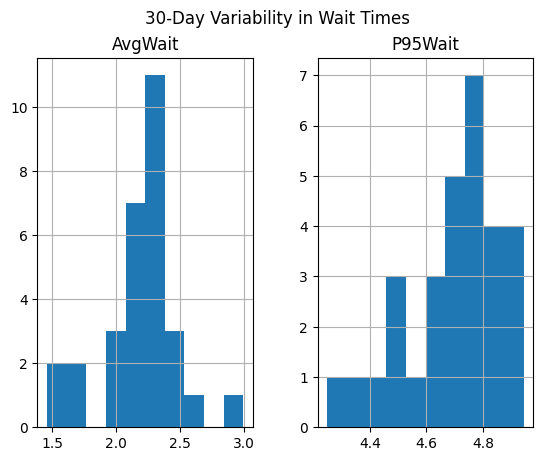

In [11]:
# 10. 30-day simulation
days = 30
daily = []
for _ in range(days):
    w,_ = simulate_with_abandon(opt[0])
    daily.append((w.mean()*60, np.percentile(w*60,95)))
df_days = pd.DataFrame(daily, columns=['AvgWait','P95Wait'])
df_days.describe()
df_days.hist(bins=10)
plt.suptitle('30-Day Variability in Wait Times')
plt.show()